# Import du dataset 'Digits'

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

digits

{&#39;data&#39;: array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 &#39;target&#39;: array([0, 1, 2, ..., 8, 9, 8]),
 &#39;frame&#39;: None,
 &#39;feature_names&#39;: [&#39;pixel_0_0&#39;,
  &#39;pixel_0_1&#39;,
  &#39;pixel_0_2&#39;,
  &#39;pixel_0_3&#39;,
  &#39;pixel_0_4&#39;,
  &#39;pixel_0_5&#39;,
  &#39;pixel_0_6&#39;,
  &#39;pixel_0_7&#39;,
  &#39;pixel_1_0&#39;,
  &#39;pixel_1_1&#39;,
  &#39;pixel_1_2&#39;,
  &#39;pixel_1_3&#39;,
  &#39;pixel_1_4&#39;,
  &#39;pixel_1_5&#39;,
  &#39;pixel_1_6&#39;,
  &#39;pixel_1_7&#39;,
  &#39;pixel_2_0&#39;,
  &#39;pixel_2_1&#39;,
  &#39;pixel_2_2&#39;,
  &#39;pixel_2_3&#39;,
  &#39;pixel_2_4&#39;,
  &#39;pixel_2_5&#39;,
  &#39;pixel_2_6&#39;,
  &#39;pixel_2_7&#39;,
  &#39;pixel_3_0&#39;,
  &#39;pixel_3_1&#39;,
 

# Récupération de Images et Targets

In [2]:
images = digits.images
images.shape

(1797, 8, 8)

In [3]:
targets = digits.target
targets.shape


(1797,)

# Afficher les images (Optionel)

In [4]:
import matplotlib.pyplot as plt

def show_example(index):
    print(targets[index])
    plt.imshow(images[index], cmap='binary')
    plt.show()
    print()

0


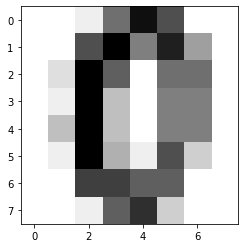


7


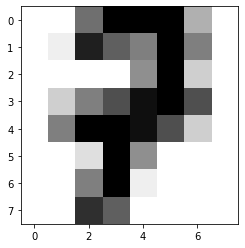


3


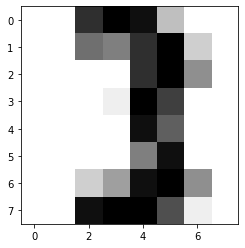


4


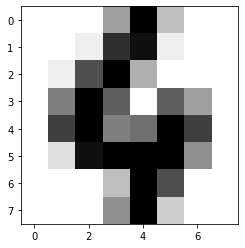


9


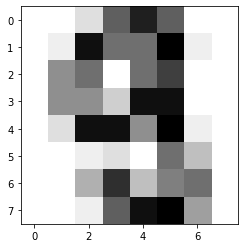

In [5]:
for i in [10, 44, 89, 64, 555]:
    show_example(i)


# Isolation

In [7]:
X = images.reshape(-1, 64)

In [8]:
Y = targets

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split as TTS
x_tr, x_te, y_tr, y_te = TTS(
    X,
    Y,
    stratify=Y,
    random_state=777,
    train_size=0.8
    )

#On affiche la dimension de chaque
for each in [x_tr, x_te, y_tr, y_te]:
    print(each.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


# Pipeline -- Mise en place

In [10]:
# pipeline éléments
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN

# pipeline materieux
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [23]:
# Crée la pipeline
# 'Non' , Objet
pipeline_details = [
    ('pca', PCA(random_state=44)),
    ('knn', KNN())
]

pipeline = Pipeline(pipeline_details)

In [24]:
# Paramétrer la grid search
#nomParam__
hyperParams = {}
hyperParams['pca__n_components'] = list(range(1, 64+1, 3))
hyperParams['knn__n_neighbors'] = [1, 3, 5, 9, 21]

In [25]:
# Créer la grid search
hyperparameter_search = GridSearchCV(
    pipeline,
    hyperParams,
    scoring='accuracy',
    cv=5
)

In [26]:
hyperparameter_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[(&#39;pca&#39;, PCA(random_state=44)),
                                       (&#39;knn&#39;, KNeighborsClassifier())]),
             param_grid={&#39;knn__n_neighbors&#39;: [1, 3, 5, 9, 21],
                         &#39;pca__n_components&#39;: [1, 4, 7, 10, 13, 16, 19, 22, 25,
                                               28, 31, 34, 37, 40, 43, 46, 49,
                                               52, 55, 58, 61, 64]},
             scoring=&#39;accuracy&#39;)

# Lancer la recherche

In [29]:
#lancer la recherche
hyperparameter_search.fit(x_tr, y_tr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[(&#39;pca&#39;, PCA(random_state=44)),
                                       (&#39;knn&#39;, KNeighborsClassifier())]),
             param_grid={&#39;knn__n_neighbors&#39;: [1, 3, 5, 9, 21],
                         &#39;pca__n_components&#39;: [1, 4, 7, 10, 13, 16, 19, 22, 25,
                                               28, 31, 34, 37, 40, 43, 46, 49,
                                               52, 55, 58, 61, 64]},
             scoring=&#39;accuracy&#39;)

In [30]:
# Meilleur score
hyperparameter_search.best_score_

0.985387630662021

In [31]:
hyperparameter_search.best_params_

{&#39;knn__n_neighbors&#39;: 3, &#39;pca__n_components&#39;: 43}

# Réentrainer un modèle avec la meilleure config (estimée) sur la totalité du train set

In [36]:
pca =  PCA(n_components=43)
knn = KNN(n_neighbors=3)

pca.fit(x_tr)
x_tr_pca = pca.transform(x_tr)
x_te_pca = pca.transform(x_te)
knn.fit(x_tr_pca, y_tr)
predictions = knn.predict(x_te_pca)

In [38]:
accuracy = lambda p,y: (p==y).sum()/p.shape[0]

"TEST ACCURACY:", accuracy(predictions, y_te)

(&#39;TEST ACCURACY:&#39;, 0.9944444444444445)

In [39]:
train_preds = knn.predict(x_tr_pca)

"TRAIN ACCURACY:", accuracy(train_preds, y_tr)

(&#39;TRAIN ACCURACY:&#39;, 0.9916492693110647)

# Tracer une confusion matrix
## Montrer les erreurs du dataset

In [42]:
from sklearn.metrics import confusion_matrix

labels = range(10)

cm_train = confusion_matrix(train_preds, y_tr, labels=labels)

cm_test = confusion_matrix(predictions, y_te, labels=labels)

In [43]:

cm_train

array([[142,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 146,   0,   0,   0,   0,   0,   0,   2,   1],
       [  0,   0, 142,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 145,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0, 145,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0, 143,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1, 145,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0, 142,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 137,   1],
       [  0,   0,   0,   0,   0,   1,   0,   1,   0, 138]])

In [41]:
cm_test

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]])

In [46]:
import pandas as pd
import seaborn as sns; sns.set()

def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

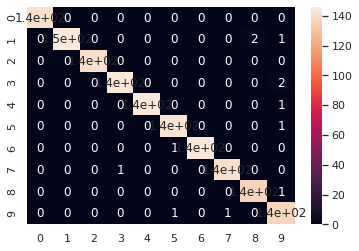

In [47]:
show_cm(cm_train, labels)

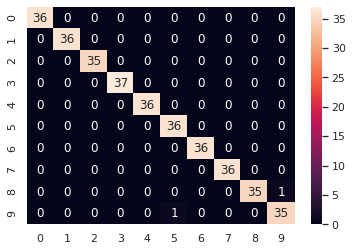

In [48]:
show_cm(cm_test, labels)